Text(0, 0.5, 'Min & Max temperature')

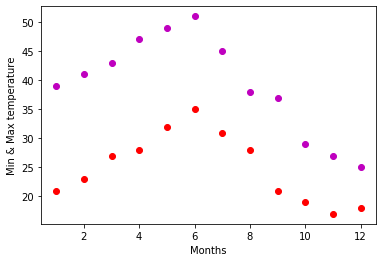

In [101]:
'''
Scipy:

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. Task:
fitting it to the periodic function
plot the fit Data Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 Expected Output:

'''

#Solution 1:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

months = np.arange(1,13)
tempMax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tempMin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
plt.plot(months, tempMin,'ro')
plt.plot(months, tempMax,'mo')
plt.xlabel("Months")
plt.ylabel("Min & Max temperature")

In [107]:
# 1. fitting it to the periodic function

from scipy import optimize
#creating a userdefined function and fitting it to a periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl* np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, tempMax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, tempMin, [-20, 10, 0])


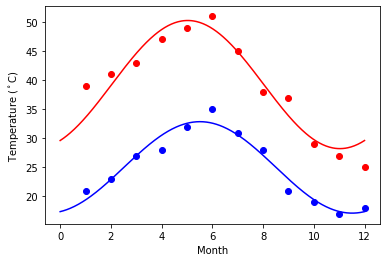

In [108]:
# 2. plot the fit

#plot the graph by plotting the fit as per the given data
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, tempMax, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, tempMin, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

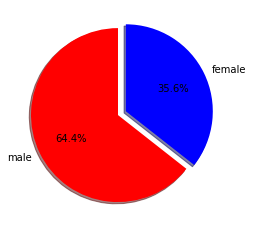

In [113]:
'''
Matplotlib:

This assignment is for visualization using matplotlib: data to use: url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv titanic = pd.read_csv(url) Charts to plot:

1. Create a pie chart presenting the male/female proportion

'''

#Solution 1.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic =pd.read_csv(url)
#titanic.head()
# plotting a pie chart depicting Male-Female proportion
totalCount=titanic['sex'].value_counts()
colors = ['red', 'blue']
explode = (0, .1)  
plt.pie(totalCount, explode=explode, labels=totalCount.index.values.tolist(),colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Male/Female proportion')
plt.show()

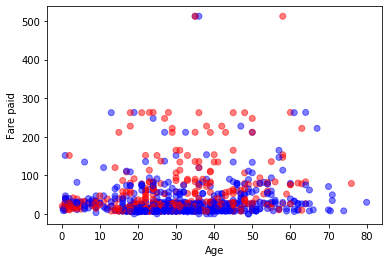

In [110]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

#titanic = titanic.dropna(subset=['sex'])
colormapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=.5, c=titanic['sex'].map(colormapping))
plt.xlabel('Age')
plt.ylabel('Fare paid')
plt.show()

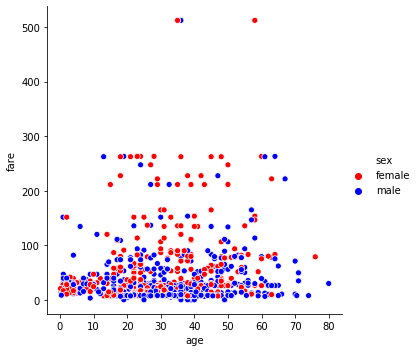

In [112]:

#2 Using another approach i.e through Seaborn library
sb.relplot( x="age", y="fare", data=titanic, hue='sex', legend='full', palette=dict(male="blue", female="red"))